In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from acquire import get_titanic_data
from prepare import prep_titanic
from splitter import splitter

# I. Titanic Data - Decision Tree

In [ ]:
df = get_titanic_data()
df.head(2)

In [ ]:
df = prep_titanic(df)
df.drop(columns='age', inplace=True)
df.head(2)

## 1. What is your baseline prediction?  Baseline accuracy?

In [ ]:
df_train, df_validate, df_test = splitter(df, 'survived')
df_train.survived.value_counts()

In [ ]:
307/(307+191)

#### Baseline prediction is died, which is accurate 61.65% of the time.

## 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
X_train = df_train.drop(columns=['survived'])
y_train = df_train.survived

X_validate = df_validate.drop(columns=['survived'])
y_validate = df_validate.survived

X_test = df_test.drop(columns=['survived'])
y_test = df_test.survived

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

## 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
y_pred = clf.predict(X_train)
y_pred[10:15]

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[10:15]

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=['died','survived'], columns=['died','survived'])

## 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

##### In sample:

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
print(classification_report(y_train, y_pred))

##### Validate:

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

In [ ]:
y_pred = clf.predict(X_validate)

print(classification_report(y_validate, y_pred))

## 5. Run through steps 2-4 using a different max_depth value.

### Using max_depth = 7:

##### Train:

In [ ]:
clf = DecisionTreeClassifier(max_depth=7, random_state=123)
clf = clf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

##### Validate:

In [ ]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

In [ ]:
y_pred = clf.predict(X_validate)

print(classification_report(y_validate, y_pred))

## 6. Which model performs better on your in-sample data?

The max_steps = 7 is better on in-sample data (as expected, more granular).

## 7. Which model performs best on your out-of-sample data, the validate set?

The max_steps = 3 is better on the validate data.

# II. Telco Data - Decision Tree

In [2]:
from acquire import get_telco_data
from prepare import prep_telco

In [3]:
df = get_telco_data()
df.head(2)

,internet_service_type_id,customer_id,contract_type_id,paperless_billing,contract_type,payment_type_id,monthly_charges,total_charges,gender,senior_citizen,...,tech_support,streaming_tv,streaming_movies,contract_type_id.1,paperless_billing.1,payment_type_id.1,monthly_charges.1,total_charges.1,churn,internet_service_type
0,2,0004-TLHLJ,1,Yes,Month-to-month,1,73.9,280.85,Male,0,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
1,1,0017-DINOC,3,No,Two year,4,45.2,2460.55,Male,0,...,Yes,Yes,No,3,No,4,45.2,2460.55,No,DSL


In [4]:
df = prep_telco(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   paperless_billing                      7032 non-null   object 
 1   contract_type                          7032 non-null   object 
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float64
 4   gender                                 7032 non-null   object 
 5   senior_citizen                         7032 non-null   int64  
 6   partner                                7032 non-null   object 
 7   dependents                             7032 non-null   object 
 8   tenure                                 7032 non-null   int64  
 9   phone_service                          7032 non-null   object 
 10  multiple_lines                         7032 non-null   object 
 11  onli

In [5]:
dropcols = [col for col in df.columns if df[col].dtype == 'object']
dropcols.remove('churn')
dropcols.append('churn_encoded')
dropcols

['paperless_billing',
 'contract_type',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'internet_service_type',
 'churn_encoded']

In [6]:
df = df.drop(columns=dropcols)
df.head(2)

,monthly_charges,total_charges,senior_citizen,tenure,contract_type_id.1,churn,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None
0,73.9,280.85,0,4,1,Yes,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,45.2,2460.55,0,54,3,No,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [7]:
df_train, df_validate, df_test = splitter(df, 'churn')
df_train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [8]:
2891/(2891+1046)

0.7343154686309372

#### Baseline case is 'not churned' and the baseline accuracy is 73.43%.

In [9]:
X_train = df_train.drop(columns=['churn'])
y_train = df_train.churn

X_validate = df_validate.drop(columns=['churn'])
y_validate = df_validate.churn

X_test = df_test.drop(columns=['churn'])
y_test = df_test.churn

In [10]:
clf = DecisionTreeClassifier(max_depth = 3, random_state=123)
clf = clf.fit(X_train, y_train)

[Text(446.4, 380.52, 'contract_type_id.1 <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = No'),
 Text(223.2, 271.8, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2161\nvalue = [1233, 928]\nclass = No'),
 Text(111.6, 163.07999999999998, 'tenure <= 5.5\ngini = 0.409\nsamples = 954\nvalue = [681, 273]\nclass = No'),
 Text(55.8, 54.360000000000014, 'gini = 0.497\nsamples = 401\nvalue = [217, 184]\nclass = No'),
 Text(167.39999999999998, 54.360000000000014, 'gini = 0.27\nsamples = 553\nvalue = [464, 89]\nclass = No'),
 Text(334.79999999999995, 163.07999999999998, 'total_charges <= 1163.45\ngini = 0.496\nsamples = 1207\nvalue = [552, 655]\nclass = Yes'),
 Text(279.0, 54.360000000000014, 'gini = 0.416\nsamples = 543\nvalue = [160, 383]\nclass = Yes'),
 Text(390.59999999999997, 54.360000000000014, 'gini = 0.484\nsamples = 664\nvalue = [392, 272]\nclass = No'),
 Text(669.5999999999999, 271.8, 'monthly_charges <= 99.95\ngini = 0.124\nsamples = 1776\nvalue = 

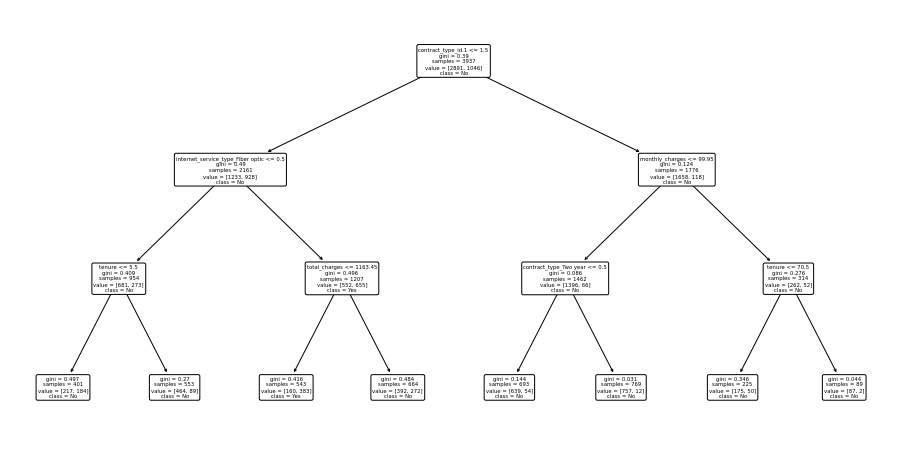

In [11]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [12]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['No', 'Yes', 'No', 'Yes', 'No'], dtype=object)

In [13]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.59036145, 0.40963855],
       [0.2946593 , 0.7053407 ],
       [0.92207792, 0.07792208],
       [0.2946593 , 0.7053407 ],
       [0.77777778, 0.22222222]])

In [14]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,No,Yes
No,2731,160
Yes,663,383


##### In training sample:

In [15]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [16]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.94      0.87      2891
         Yes       0.71      0.37      0.48      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



##### In validation sample:

In [18]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validation set: 0.79


In [19]:
y_pred = clf.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.95      0.87      1239
         Yes       0.71      0.37      0.48       449

    accuracy                           0.79      1688
   macro avg       0.76      0.66      0.68      1688
weighted avg       0.78      0.79      0.77      1688



### Using max_depth = 7

In [47]:
clf = DecisionTreeClassifier(max_depth = 7, random_state=123)
clf = clf.fit(X_train, y_train)

[Text(502.052380952381, 407.7, 'contract_type_id.1 <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = No'),
 Text(271.0285714285714, 353.34000000000003, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2161\nvalue = [1233, 928]\nclass = No'),
 Text(147.61904761904762, 298.98, 'tenure <= 5.5\ngini = 0.409\nsamples = 954\nvalue = [681, 273]\nclass = No'),
 Text(75.58095238095238, 244.62, 'device_protection_No internet service <= 0.5\ngini = 0.497\nsamples = 401\nvalue = [217, 184]\nclass = No'),
 Text(37.79047619047619, 190.26, 'total_charges <= 109.1\ngini = 0.492\nsamples = 250\nvalue = [109, 141]\nclass = Yes'),
 Text(18.895238095238096, 135.89999999999998, 'multiple_lines_No phone service <= 0.5\ngini = 0.458\nsamples = 149\nvalue = [53, 96]\nclass = Yes'),
 Text(9.447619047619048, 81.54000000000002, 'monthly_charges <= 45.625\ngini = 0.485\nsamples = 97\nvalue = [40, 57]\nclass = Yes'),
 Text(4.723809523809524, 27.180000000000007, 'gini = 0.493\nsamp

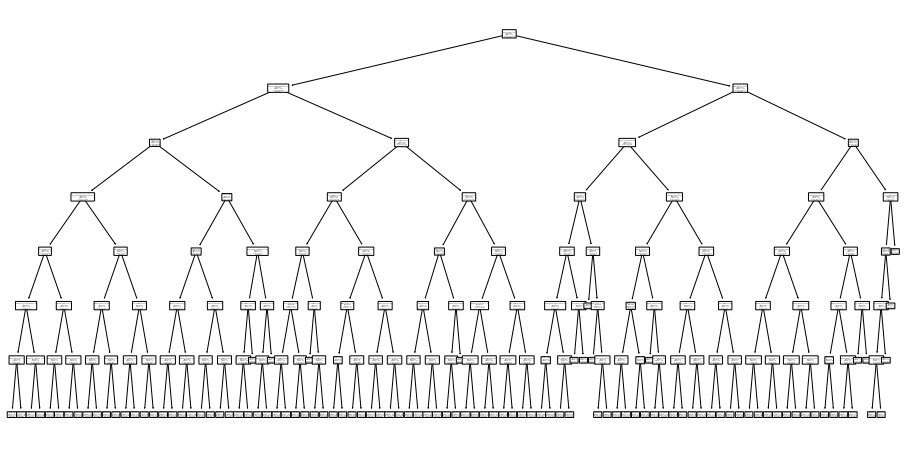

In [48]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [49]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['No', 'Yes', 'No', 'No', 'No'], dtype=object)

In [50]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.53246753, 0.46753247],
       [0.45544554, 0.54455446],
       [1.        , 0.        ],
       [0.72727273, 0.27272727],
       [0.76712329, 0.23287671]])

In [51]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,No,Yes
No,2648,243
Yes,406,640


##### In training sample:

In [52]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [53]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89      2891
         Yes       0.72      0.61      0.66      1046

    accuracy                           0.84      3937
   macro avg       0.80      0.76      0.78      3937
weighted avg       0.83      0.84      0.83      3937



##### In validation sample:

In [54]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validation set: 0.77


In [55]:
y_pred = clf.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1239
         Yes       0.58      0.51      0.54       449

    accuracy                           0.77      1688
   macro avg       0.70      0.69      0.69      1688
weighted avg       0.76      0.77      0.76      1688



### Comparison at different max levels:

In [58]:
for i in range(1,9):
    clf = DecisionTreeClassifier(max_depth = i, random_state=123)
    clf = clf.fit(X_train, y_train)
    print(f'Depth = {i}')
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Depth = 1
Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on validation set: 0.73
Depth = 2
Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on validation set: 0.77
Depth = 3
Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on validation set: 0.79
Depth = 4
Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on validation set: 0.78
Depth = 5
Accuracy of Decision Tree classifier on training set: 0.81
Accuracy of Decision Tree classifier on validation set: 0.78
Depth = 6
Accuracy of Decision Tree classifier on training set: 0.82
Accuracy of Decision Tree classifier on validation set: 0.78
Depth = 7
Accuracy of Decision Tree classifier on training set: 0.84
Accuracy of Decision Tree classifier on validation set: 0.77
Depth = 8
Accuracy of Decision Tree classifier on training set: 0.85
Accuracy of Decision 